In [1]:
import tensorflow as tf
import tensorboard
import matplotlib.pyplot as plt

In [2]:
(train_img,train_labels),(test_img,test_labels) = tf.keras.datasets.cifar10.load_data()
print(f'train images',train_img.shape)

train images (50000, 32, 32, 3)


In [3]:
train_img[0].shape

(32, 32, 3)

(-0.5, 31.5, 31.5, -0.5)

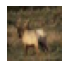

In [4]:
fig, ax = plt.subplots(figsize=(1,1))
plt.imshow(train_img[3])
plt.axis(False)

In [3]:
names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

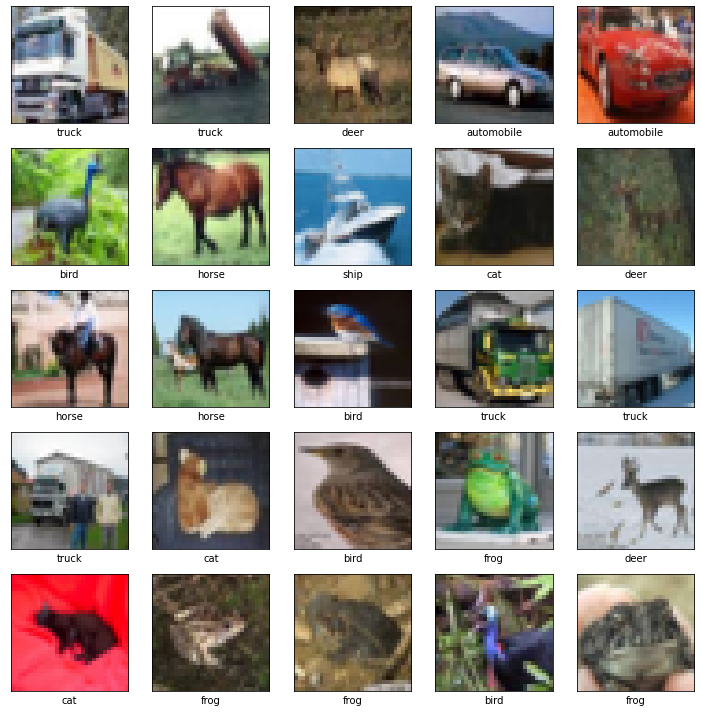

In [6]:
plt.figure(figsize=(10,10))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i])
    plt.xlabel(names[train_labels[i][0]])
plt.tight_layout()
plt.show()

# CNN Architecture

In [7]:
num_filter = 32
conv_kernel = (3,3)
input_shape = train_img[0].shape # (32,32,3)
maxpool_kernel = (2,2)
epochs=20

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(num_filter,conv_kernel,activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D(maxpool_kernel))
model.add(tf.keras.layers.Conv2D(num_filter*2,conv_kernel,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(maxpool_kernel))
model.add(tf.keras.layers.Conv2D(num_filter*2,conv_kernel,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(maxpool_kernel))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
stopper = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)
history = model.fit(train_img,train_labels,
          epochs=epochs, validation_data=(test_img,test_labels),
          callbacks=[stopper])

Epoch 1/20
1563/1563 [==============================] - 82s 52ms/step - loss: 2.8771 - accuracy: 0.3090 - val_loss: 1.4526 - val_accuracy: 0.4728
Epoch 2/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4054 - accuracy: 0.4980 - val_loss: 1.2600 - val_accuracy: 0.5519
Epoch 3/20
1563/1563 [==============================] - 75s 48ms/step - loss: 1.2333 - accuracy: 0.5655 - val_loss: 1.1979 - val_accuracy: 0.5913
Epoch 4/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1148 - accuracy: 0.6092 - val_loss: 1.0952 - val_accuracy: 0.6156
Epoch 5/20
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0405 - accuracy: 0.6365 - val_loss: 1.0974 - val_accuracy: 0.6229
Epoch 6/20
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9627 - accuracy: 0.6662 - val_loss: 1.0317 - val_accuracy: 0.6467
Epoch 7/20
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9053 - accuracy: 0.6853 - val_loss: 1.0177 -

In [12]:
model.save("cifar_10.h5")

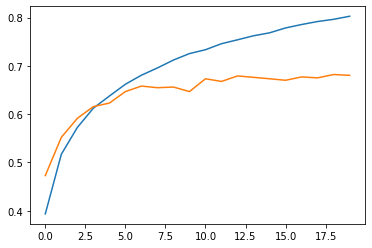

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

testing and using the model

In [4]:
model = tf.keras.models.load_model('cifar_10.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

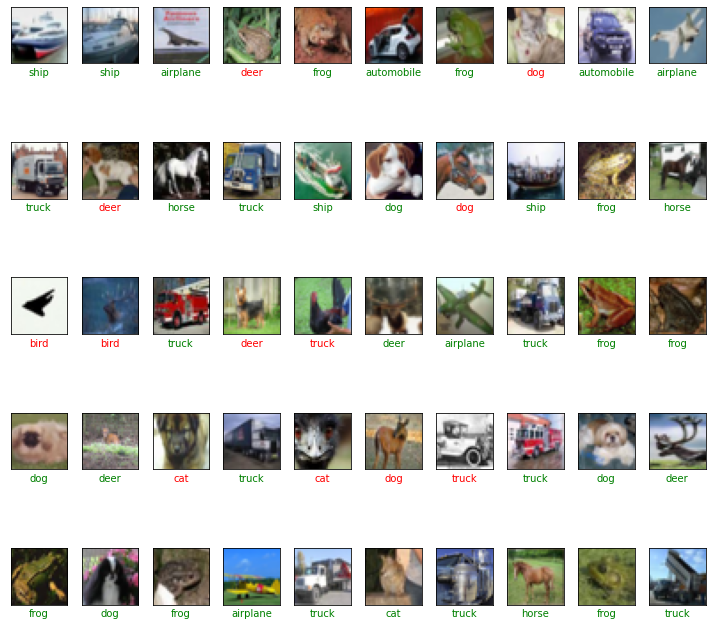

In [13]:
plt.figure(figsize=(10,10))
for i in range(1,51):
    plt.subplot(5,10,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_img[i])
    result = model.predict(test_img[i].reshape(1,32,32,3))
    pred_label = names[result.argmax()]
    orig_label = names[test_labels[i][0]]
    plt.xlabel(pred_label,color='g' if pred_label == orig_label else 'r')
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
pred_labels = model.predict(test_img)

In [28]:
pred_labels_cleaned = []
for labels in pred_labels:
    pred_labels_cleaned.append(labels.argmax())

In [29]:
import numpy as np

In [30]:
pred_labels_cleaned = np.array(pred_labels_cleaned).reshape(10000,1)

In [33]:
confusion_matrix(test_labels,pred_labels_cleaned)

array([[718,  24,  69,  42,  20,  11,  21,  17,  56,  22],
       [ 25, 849,   7,  10,   4,   6,   9,   9,  26,  55],
       [ 53,   9, 549, 101,  68,  81,  88,  34,  11,   6],
       [ 21,   8,  47, 546,  52, 200,  86,  25,  11,   4],
       [ 17,   4,  69,  87, 599,  60,  80,  70,  10,   4],
       [  7,   5,  41, 166,  38, 631,  57,  40,   8,   7],
       [  6,   4,  47,  60,  30,  36, 794,   8,  13,   2],
       [ 12,   3,  29,  55,  66, 129,  12, 679,   6,   9],
       [112,  33,  21,  30,   4,   5,   7,   6, 744,  38],
       [ 42, 133,  18,  24,   8,  11,  15,  22,  33, 694]], dtype=int64)

In [34]:
print(classification_report(test_labels,pred_labels_cleaned))

              precision    recall  f1-score   support

           0       0.71      0.72      0.71      1000
           1       0.79      0.85      0.82      1000
           2       0.61      0.55      0.58      1000
           3       0.49      0.55      0.51      1000
           4       0.67      0.60      0.63      1000
           5       0.54      0.63      0.58      1000
           6       0.68      0.79      0.73      1000
           7       0.75      0.68      0.71      1000
           8       0.81      0.74      0.78      1000
           9       0.83      0.69      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [35]:
model.input_shape

(None, 32, 32, 3)

In [36]:
from PIL import Image

In [38]:
img = Image.open('ship.jpg')
img.size

(1540, 800)

In [47]:
input_img = img.resize((32,32))

In [48]:
# convert in numpy matrix
input_img = np.array(input_img)
# reshape it for passing it as a single input
input_img = np.array([input_img])

In [50]:
input_img.shape

(1, 32, 32, 3)

In [51]:
result = model.predict(input_img)
print(names[result.argmax()])

ship


Text(0.5, 1.0, 'ship')

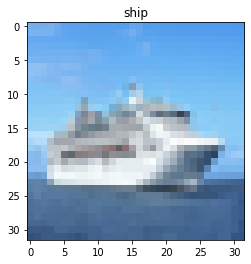

In [53]:
plt.imshow(input_img[0])
plt.title(names[result.argmax()])

In [54]:
def predict(img_path , model, show_img=True):
    img = Image.open(img_path)
    # resize the image into input shape for  model
    input_img = img.resize((32,32))
    # convert in numpy matrix
    input_img = np.array(input_img)
    # reshape it for passing it as a single input
    input_img = np.array([input_img])
    result = model.predict(input_img)
    output = names[result.argmax()]
    if show_img:
        plt.imshow(input_img[0])
        plt.title(output)
        plt.show()
    return output       

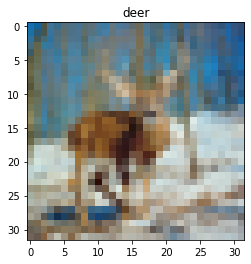

'deer'

In [55]:
predict('deer.jpg',model)